In [1]:
import tpot
import numpy as np
import pandas as pd
from sklearn import set_config
set_config(display="diagram")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
df['race/ethnicity'].value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64

In [5]:
df['parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

In [6]:
df['lunch'].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

In [7]:
df['test preparation course'].value_counts()

none         656
completed    344
Name: test preparation course, dtype: int64

In [8]:
df['gender_encoded'] = df['gender'].map({'male': 1, 'female': 0})
df['race_encoded'] = df['race/ethnicity'].map({'group A': 4, 'group B': 3, 'group C': 2, 'group D': 1, 'group E': 0})
df['parent_encoded'] = df['parental level of education'].map({'some high school': 1,
                                                            'high school': 2,
                                                            "associate's degree": 3,
                                                            'some college': 4,
                                                            "bachelor's degree": 5,
                                                            "master's degree": 6})
df['lunch_encoded'] = df['lunch'].map({'standard': 0, 'free/reduced': 1})
df['prep_encoded'] = df['test preparation course'].map({'none': 0, 'completed': 1})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race_encoded,parent_encoded,lunch_encoded,prep_encoded
0,female,group D,some college,standard,completed,59,70,78,0,1,4,0,1
1,male,group D,associate's degree,standard,none,96,93,87,1,1,3,0,0
2,female,group D,some college,free/reduced,none,57,76,77,0,1,4,1,0
3,male,group B,some college,free/reduced,none,70,70,63,1,3,4,1,0
4,female,group D,associate's degree,standard,none,83,85,86,0,1,3,0,0


In [9]:
X = df.drop(['math score', 'reading score', 
             'writing score', 'gender', 'race/ethnicity', 
             'parental level of education', 'lunch',
           'test preparation course'], axis=1)
y = df['math score']

print(X.shape, y.shape)

(1000, 5) (1000,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X['race_encoded'], test_size = 0.25, random_state=42)

In [11]:
from tpot import TPOTRegressor

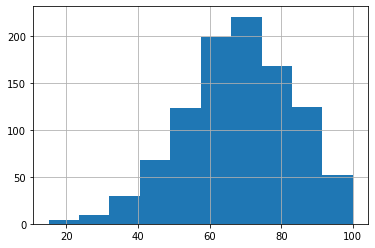

In [15]:
y.hist();

In [18]:
math_pred = TPOTRegressor(population_size = 50, cv=5, max_eval_time_mins=0.2, max_time_mins=10, verbosity = 2)

In [19]:
math_pred.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -178.20817045812421

Generation 2 - Current best internal CV score: -176.53092745818913

Generation 3 - Current best internal CV score: -175.42451117542433

Generation 4 - Current best internal CV score: -175.42451117542433

Generation 5 - Current best internal CV score: -175.42451117542433

Generation 6 - Current best internal CV score: -175.42451117542433

Generation 7 - Current best internal CV score: -175.3079281466673

Generation 8 - Current best internal CV score: -175.3079281466673

Generation 9 - Current best internal CV score: -175.3079281466673

Generation 10 - Current best internal CV score: -175.0112285713676

Generation 11 - Current best internal CV score: -175.0112285713676

Generation 12 - Current best internal CV score: -175.0112285713676

Generation 13 - Current best internal CV score: -174.76556937117556

Generation 14 - Current best internal CV score: -174.76556937117556

Generation 15 - Current best internal CV score: 

TPOTRegressor(max_eval_time_mins=0.2, max_time_mins=10, population_size=50,
              verbosity=2)

In [181]:
math_pred.score(X_test,y_test)

-151.82595885927367

In [182]:
math_pred.fitted_pipeline_

Pipeline(steps=[('normalizer', Normalizer(norm='max')),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.75, max_depth=1,
                                           max_features=0.5, min_samples_leaf=9,
                                           min_samples_split=19,
                                           subsample=0.8))])

In [179]:
math_pred.export('tpot_mathprev.py')

In [68]:
y_pred = math_pred.predict(X_test)

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [169]:
# calcular R² para previsto1
mse_1 = mean_squared_error(y_test, y_pred)

C:\Users\ggcs1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


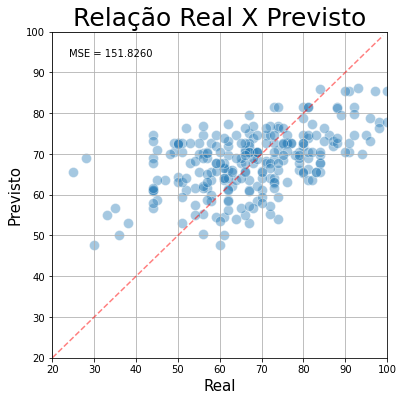

In [171]:
plt.figure(figsize=(6,6))
plt.title('Relação Real X Previsto', fontsize=25)
sns.scatterplot(y_test, y_pred, alpha=0.4, s=100)

linha_x = np.arange(100)
linha_y = linha_x
plt.plot(linha_x, linha_y, 'r--', alpha=0.5)

plt.xlim((20,100))
plt.ylim((20,100))

plt.xlabel('Real',fontsize=15)
plt.ylabel('Previsto',fontsize=15)
plt.text(0.05, 0.95, f"MSE = {mse_1:.4f}", transform=plt.gca().transAxes, ha='left', va='top')
plt.grid();

In [119]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [120]:
# Criando um modelo de regressão linear
modelo = SGDRegressor()

In [121]:
parametros = {
    'alpha': uniform(0.0001, 1),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': uniform(0, 1)}

math_rscv = RandomizedSearchCV(modelo, param_distributions=parametros, n_iter=100)

In [125]:
math_rscv.fit(X_train, y_train)
print(math_rscv.best_params_)

{'alpha': 0.04151876390860555, 'l1_ratio': 0.8241945837370115, 'penalty': 'l1'}


In [128]:
best_model = math_rscv.best_estimator_
y_rscv = best_model.predict(X_test)

In [174]:
# calcular R² para previsto2
mse_2 = mean_squared_error(y_test, y_rscv)

C:\Users\ggcs1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


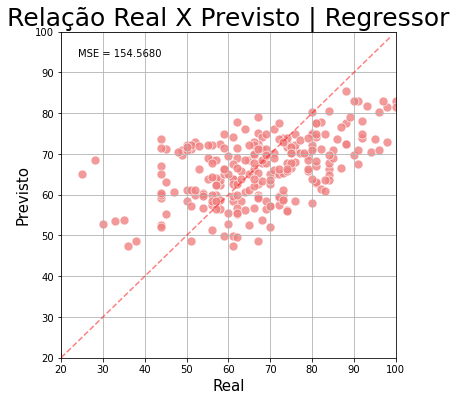

In [178]:
plt.figure(figsize=(6,6))
plt.title('Relação Real X Previsto | Regressor', fontsize=25)
sns.scatterplot(y_test, y_rscv, alpha=0.8, s=80, color='lightcoral')
#sns.scatterplot(y_test, y_pred, alpha=0.4, s=80)

linha_x = np.arange(100)
linha_y = linha_x
plt.plot(linha_x, linha_y, 'r--', alpha=0.5)

plt.xlim((20,100))
plt.ylim((20,100))

plt.xlabel('Real',fontsize=15)
plt.ylabel('Previsto',fontsize=15)
plt.text(0.05, 0.95, f"MSE = {mse_2:.4f}", transform=plt.gca().transAxes, ha='left', va='top')
plt.grid();